In [1]:
import argparse
import h5py
from os import walk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import time

In [2]:
def cross_coorelation(initial, all_beats):
    zero = np.zeros(100)
    beats = np.concatenate((zero, all_beats))
    cut_beat = None
    peak = 0
    shift = 0
    index = 0
    for i in range(len(initial)):
        vals = beats[shift:len(initial)+shift] * initial
        h = np.amax(vals)
        if h > peak:
            peak = h
            index = shift
        shift += 1
    cut_beat = beats[index:len(initial)+index]
    return cut_beat, beats[len(initial):]

def similarity_score_sum_of_7th(avg, graph):
    diff = np.absolute(avg-graph)
    diff*=10
    diff = diff*diff*diff*diff*diff*diff*diff
    return np.sum(diff) / len(diff) / 10

def drop_bad_data(average,cuts):
    updated_cuts = []
    for cut in cuts:
        sim = similarity_score_sum_of_7th(average, cut)
        if sim < 5:
            updated_cuts.append(cut)
    return updated_cuts

In [3]:
full_beats = np.load('afib_ecg.npy').astype(np.float16)

In [4]:
print(full_beats.shape)
print(full_beats[0].reshape(4096))

(41852, 1, 4096)
[0. 0. 0. ... 0. 0. 0.]


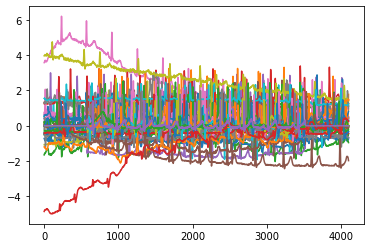

In [5]:
x_axis = np.arange(4096)
for i in range(5, 100):
    plt.plot(x_axis, full_beats[i].reshape(4096))

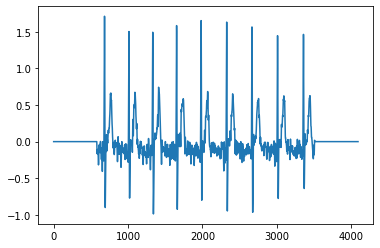

In [10]:
plt.plot(x_axis, full_beats[9].reshape(4096))

In [11]:
average = np.trim_zeros(full_beats[0].reshape(4096))[0:326]
x_axis = np.arange(len(average))
individual_good_beats = []
start = time.perf_counter()

for i in range(1000):
    beats = np.trim_zeros(full_beats[i].reshape(4096))
    updated_list = beats
    cuts = []
    while(updated_list.size > 700):
        cut, updated_list = cross_coorelation(average, updated_list)
        cuts.append(cut)
    cuts = drop_bad_data(average,cuts)
    for cut in cuts:
        individual_good_beats.append(np.array(cut))
    
end = time.perf_counter()
print(end-start)

24.881470356951468


In [31]:
print(np.array(individual_good_beats).shape)
print(individual_good_beats[0].shape)

(616582, 326)
(326,)


In [32]:
np.save('Heartbeats.npy', np.array(individual_good_beats))

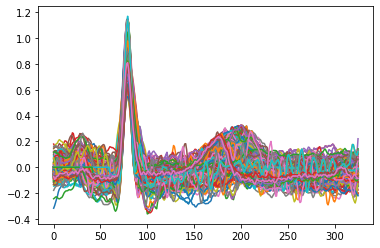

In [28]:
for cut in individual_good_beats:
    plt.plot(x_axis, cut)